1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [6]:
from scipy.stats import poisson
import numpy as np
import matplotlib as plt
from math import sqrt, pi, erf
from scipy import stats
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

Z score =  3.4661629670697414


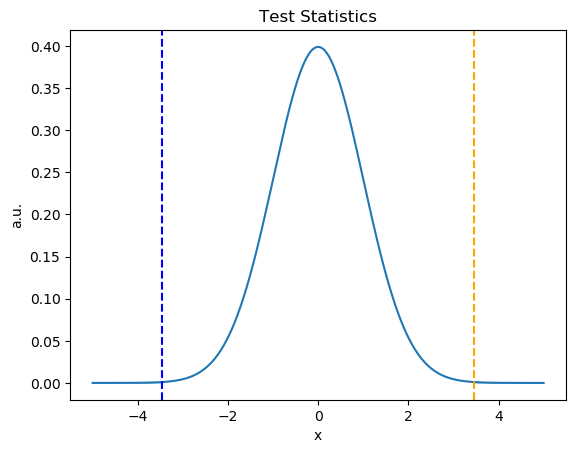

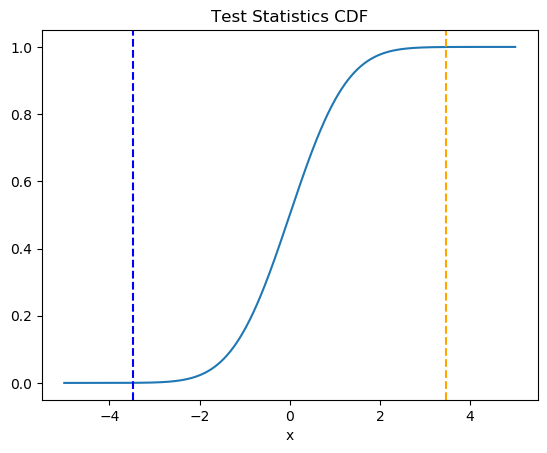

p-value:  0.0005279431738299246
the p-value is smaller than alpha=0.05,reject all null hypothesis


In [8]:
alpha = 0.05
x0 = 15
mu = 6.3

x = np.linspace(0, 20, 1000)
freq = stats.poisson.pmf(x, mu)
var = np.sqrt(stats.poisson.var(mu))

# 2 zvalue
z = abs(x0 - mu) /var
print('Z score = ', z)
xs = np.linspace(-5, 5, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs,ts,where=np.abs(xs) > np.abs(z), color = 'lightblue')
plt.axvline(z, linestyle = '--', color = 'orange')
plt.axvline(-z, linestyle = '--', color = 'blue')
plt.title('Test Statistics')
plt.ylabel('a.u.')
plt.xlabel('x')
plt.show()

# pvalue
cs = stats.norm.cdf(xs)
plt.plot(xs,cs)
plt.axvline(z, linestyle = '--', color = 'orange')
plt.axvline(-z, linestyle = '--', color = 'blue')
plt.title('Test Statistics CDF')
plt.xlabel('x')
plt.show()

pvalue = stats.norm.cdf(-z) + (1. - stats.norm.cdf(z))
print('p-value: ', pvalue)
print("the p-value is smaller than alpha=0.05,reject all null hypothesis")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = 3.786997938137629


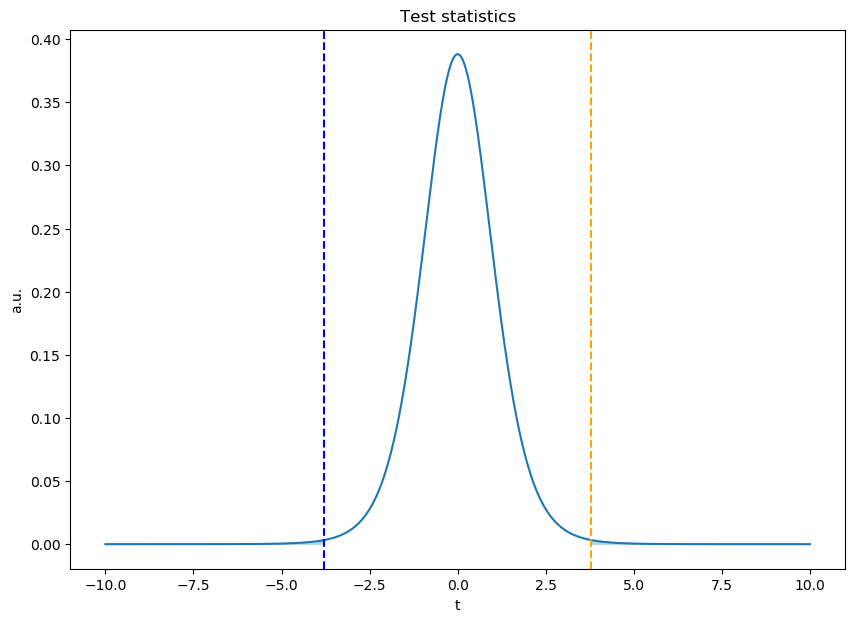

p-value = 0.004302464132864604


In [9]:
#alpha
alpha = 0.05
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# variance for pre and post
var1 = np.var(pre, ddof=1)
var2 = np.var(post, ddof=1)

# standard deviation
sigma = np.sqrt( ( var1 + var2 ) / 2 )
mean1 = np.mean(pre)
mean2 = np.mean(post)
n = len(pre)
T = abs(mean1-mean2)/(sigma * np.sqrt(2/n))
print("T =", T)

xs = np.linspace(-10, +10, 1000)
ts = stats.t.pdf(xs, n - 1)

# test statistics
plt.figure(figsize=(10, 7))
plt.plot(xs, ts)
plt.title("Test statistics")
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# p-value
pvalue = stats.t.cdf(-T, n - 1) + (1. - stats.t.cdf(T, n - 1))
print("p-value =", pvalue)

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

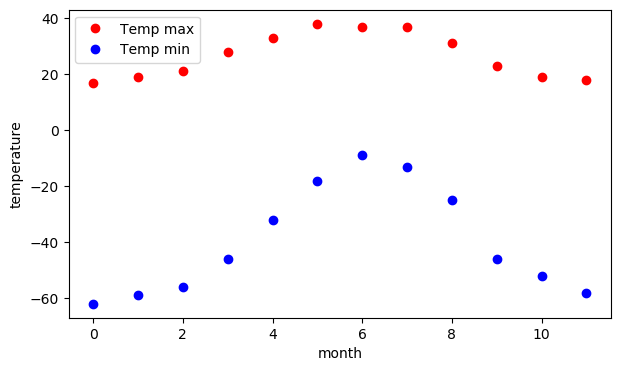

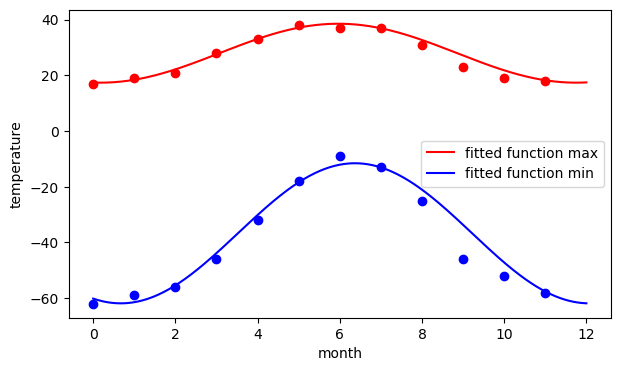

popt max:
 [10.58169947  2.07379431 27.94963584 -3.07063128]
cov max:
 [[ 0.16816291 -0.00300607  0.00655913  0.00292187]
 [-0.00300607  0.00550098  0.02241674 -0.00671601]
 [ 0.00655913  0.02241674  0.18338665 -0.02696974]
 [ 0.00292187 -0.00671601 -0.02696974  0.01332244]]
amplitude = 10.58 +- 0.41
frequency = 2.07 +- 0.07
amplitude offset = 27.95 +- 0.43
time offset = -3.07 +- 0.12

popt min:
 [ 25.14962046   2.10546981 -36.71256992  -3.52075181]
cov min:
 [[ 1.72807247e+00 -8.69308325e-04  1.89183981e-01 -7.95947391e-03]
 [-8.69308325e-04  6.50656065e-03  5.60246190e-02 -6.75696703e-03]
 [ 1.89183981e-01  5.60246190e-02  1.41861151e+00 -5.29770283e-02]
 [-7.95947391e-03 -6.75696703e-03 -5.29770283e-02  1.58024230e-02]]
amplitude = 25.15 +- 1.31
frequency = 2.11 +- 0.08
amplitude offset = -36.71 +- 1.19
time offset = -3.52 +- 0.13


In [10]:
temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#Temperature
month = np.arange(12)
plt.figure(figsize=(7, 4))
plt.plot(month, temp_max, 'ro', label='Temp max')
plt.plot(month, temp_min, 'bo', label='Temp min')
plt.legend(loc='best')
plt.xlabel('month')
plt.ylabel('temperature')
 
# function with min and max temperatures 
temps = lambda t, a, b, c, d: (a * np.sin(b*np.pi*(t + d)/t.max()) + c)

popt_max, pcov_max = optimize.curve_fit(temps, month,temp_max, [20,1,20,0])

popt_min, pcov_min = optimize.curve_fit(temps, month, temp_min, [50,1,-60,0])

days = np.linspace(0, 12, num=365)

# plot
plt.figure(figsize=(7, 4))
plt.plot(month, temp_max, 'ro')
plt.plot(days, temps(days, *popt_max), 'r-', label='fitted function max')
plt.plot(month, temp_min, 'bo')
plt.plot(days, temps(days, *popt_min), 'b-', label='fitted function min')
plt.xlabel('month')
plt.ylabel('temperature')
plt.legend(loc='best')
plt.show()

print('popt max:\n', popt_max)
print('cov max:\n', pcov_max)
print("amplitude = %.2f +- %.2f" % (popt_max[0], np.sqrt(pcov_max[0,0]))) 
print("frequency = %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1]))) 
print("amplitude offset = %.2f +- %.2f" % (popt_max[2], np.sqrt(pcov_max[2,2]))) 
print("time offset = %.2f +- %.2f" % (popt_max[3], np.sqrt(pcov_max[3,3]))) 
print()
print('popt min:\n', popt_min)
print('cov min:\n', pcov_min)
print("amplitude = %.2f +- %.2f" % (popt_min[0], np.sqrt(pcov_min[0,0]))) 
print("frequency = %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1]))) 
print("amplitude offset = %.2f +- %.2f" % (popt_min[2], np.sqrt(pcov_min[2,2]))) 
print("time offset = %.2f +- %.2f" % (popt_min[3], np.sqrt(pcov_min[3,3]))) 

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [ ]:
#1
data=np.load("data/residuals_261.pkl",allow_pickle=True).item()
residuals=pd.DataFrame(data,columns=['residuals']).query("abs(residuals)<2")
distances=pd.DataFrame(data,columns=['distances'])
freq, bins, _ = plt.hist(residuals, bins=40)
bins = (bins[1:] + bins[:-1])/2

# 2 Poisson uncertainty 
#sigma_bins= np.sqrt(freq)
sigma_bins= np.zeros(len(freq))
for i in range(len(freq)):
    if(freq[i]==0):
        sigma_bins[i]=0
    else:
        sigma_bins[i]=1/np.sqrt(freq[i])
sigma_bins= np.sqrt(freq)
# an appropriate function math.exp(a*x) 2**(a*x-b)
#res = lambda x, a, b: (stats.norm.pdf(x,a,b))
def res(x, H, A, x0, sigma):
    return (H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)))/(sigma*2*np.pi)
#def fit(x, mu, b,sigma,o):
#return (o + b * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)))/(sigma*2*math.pi)
#fit it to the histogram of the residuals
popt, pcov = optimize.curve_fit(res, bins, freq, maxfev = 10000)# [1, 0.01], maxfev = 1000, full_output=False)
print('popt:',popt)
x = np.linspace(bins[1], bins[-1], num=500)

# plot 
plt.plot(x, res(x,*popt), 'r-', label='fitted function')
plt.xlabel('month')
plt.ylabel('temperature')
plt.legend(loc='best')

# Perform a goodness-of-fit test
plt.errorbar(bins,freq , yerr=sigma_bins, fmt='.k') # use plt.errorbar to plot points with the corresponding uncertainties

# set the number of degrees of freedom
ndof = len(bins) - 1

# calculate the chi^2
chi2 = np.sum((freq - (res(bins,*popt)))**2 / sigma_bins**2)
print("chi2 =", chi2)

ts = stats.chi2.pdf(x, df=ndof)

# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # p-value is < 0.05, the fit is unsatisfactory

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [ ]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/
path='data/munich_temperatures_average_with_bad_data.txt'
date=np.loadtxt(path,usecols=0)
temp=np.loadtxt(path,usecols=1)
indexes=np.where((date>=2008) & (date<=2012))
def f(t,a,b,c):
    return a*(np.cos(2*np.pi*t+b))+c

temp_red=temp[indexes]
date_red=date[indexes]
popt, pcov = sp.optimize.curve_fit(f, date_red,temp_red)
curve_fit=f(date_red, *popt)
ax=plt.figure(figsize=(13,8))
plt.plot(date_red,temp_red,'.b',label='Temperature measurements')
plt.plot(date_red, curve_fit, 'red',label='Best-fit')
plt.xlabel('Year')
plt.ylabel('Temperature[C°]')
plt.legend()
plt.title('Temperature in Munich(2008-2012)')


print('best-fit parameters:',popt)
print('average temperature[C°]:',np.mean(curve_fit))
print('hottest temperature predicted by the model[C°]:',np.max(curve_fit))
print('coldest temperature predicted by the model[C°]:',np.min(curve_fit))

#the b parameters stands for the phase
#so its phisycal meaning is identifying when the coldest and hottest days happen during the year 

def g(t,a,b,c,d):
    return a*(np.cos(2*b*np.pi*t+c))+d

poptg,pcovg=sp.optimize.curve_fit(g, date_red,temp_red)
curveg_fit=g(date_red,*poptg)
#Residuals sum of squares
RSSf=np.sum((curve_fit-temp_red)**2)
RSSg=np.sum((curveg_fit-temp_red)**2)
print('RSSf:',RSSf)
print('RSSg:',RSSg)
#Fisher test

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=True):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - sp.stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    alpha=0.05
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

ndoff=3-1
ndofg=4-1
N=len(temp_red)
pval=Ftest(RSSf,RSSg,ndoff,ndofg,N)